In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

In [2]:
### mp3 파일을 librosa로 읽어와서 오디오 신호의 정보와 그림, 플레이어를 그리는 함수

def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player

    Notebook: C1/B_PythonAudio.ipynb

    Args:
        x: Input signal
        Fs: Sampling rate of x
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

In [3]:
### .pcm 파일을 .wav 파일로 바꾸는 함수
import wave

# The parameters are prerequisite information. More specifically,
# channels, bit_depth, sampling_rate must be known to use this function.
def pcm2wav( pcm_file, wav_file, channels=1, bit_depth=16, sampling_rate=16000 ):

    # Check if the options are valid.
    if bit_depth % 8 != 0:
        raise ValueError("bit_depth "+str(bit_depth)+" must be a multiple of 8.")
        
    # Read the .pcm file as a binary file and store the data to pcm_data
    with open( pcm_file, 'rb') as opened_pcm_file:
        pcm_data = opened_pcm_file.read();
        
        obj2write = wave.open( wav_file, 'wb')
        obj2write.setnchannels( channels )
        obj2write.setsampwidth( bit_depth // 8 )
        obj2write.setframerate( sampling_rate )
        obj2write.writeframes( pcm_data )
        obj2write.close()

In [5]:
### 새로 받은 한국어 음성 데이터 1번부터 10번까지 wav 파일로 변환
for i in range(1, 11):
    num = '{0:06d}'.format(i)
    pcm_path = 'KsponSpeech_01/KsponSpeech_01/KsponSpeech_0001/KsponSpeech_' + num + '.pcm'
    wav_path = 'KsponSpeech_wav/KsponSpeech_' + num + '.wav'
    pcm2wav( pcm_path, wav_path, 1, 16, 16000 )

000001
MP3 file:  Fs = 16000, x.shape = (50368,), x.dtype = float32


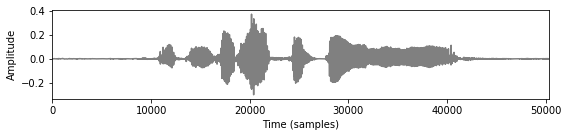

mfcc_shape = (20, 99)
000002
MP3 file:  Fs = 16000, x.shape = (169440,), x.dtype = float32


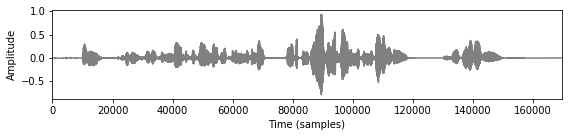

mfcc_shape = (20, 331)
000003
MP3 file:  Fs = 16000, x.shape = (197120,), x.dtype = float32


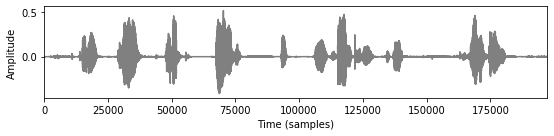

mfcc_shape = (20, 386)
000004
MP3 file:  Fs = 16000, x.shape = (146016,), x.dtype = float32


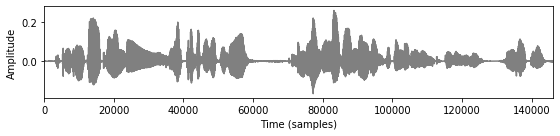

mfcc_shape = (20, 286)
000005
MP3 file:  Fs = 16000, x.shape = (81168,), x.dtype = float32


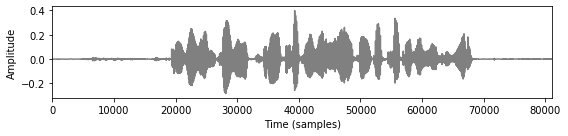

mfcc_shape = (20, 159)
000006
MP3 file:  Fs = 16000, x.shape = (61792,), x.dtype = float32


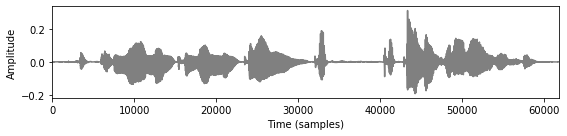

mfcc_shape = (20, 121)
000007
MP3 file:  Fs = 16000, x.shape = (193520,), x.dtype = float32


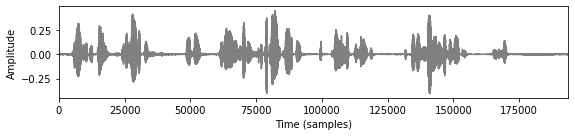

mfcc_shape = (20, 378)
000008
MP3 file:  Fs = 16000, x.shape = (20688,), x.dtype = float32


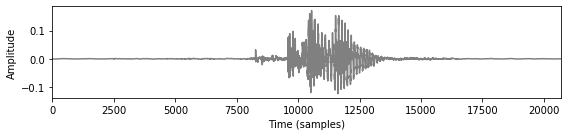

mfcc_shape = (20, 41)
000009
MP3 file:  Fs = 16000, x.shape = (101280,), x.dtype = float32


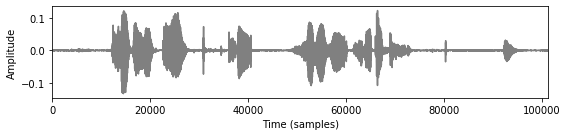

mfcc_shape = (20, 198)


In [91]:
### 변환한 .wav 파일 10개 mfcc로 변환.
for i in range(1, 10):
    num = '{0:06d}'.format(i)
    wav_path = 'KsponSpeech_wav/KsponSpeech_' + num + '.wav'
    print(num)
    
    x, Fs = librosa.load(wav_path, sr=None)
    print_plot_play(x=x, Fs=Fs, text='MP3 file: ')
    mfcc = librosa.feature.mfcc(y=x)
    print('mfcc_shape =', mfcc.shape)

MP3 file:  Fs = 16000, x.shape = (169440,), x.dtype = float32


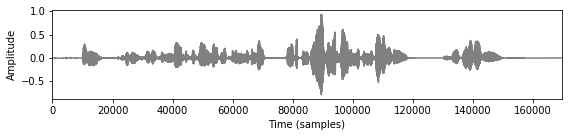

mfcc_shape = (20, 331)


In [63]:
### 10초짜리 2번 음성 데이터
wav_path = 'KsponSpeech_wav/KsponSpeech_000002.wav'
x, Fs = librosa.load(wav_path, sr=None)
print_plot_play(x=x, Fs=Fs, text='MP3 file: ')
mfcc = librosa.feature.mfcc(y=x)
print('mfcc_shape =', mfcc.shape)

음성 데이터 1초씩 자르기
----------------------------------

### #위 코드는 그대로고...

* 10초짜리 음성 데이터 가져와서 1초씩 잘라서 추가한것임
* mfcc로 변환하면 (20, 198) 크기 2차원 넘파이 배열 생성

MP3 file:  Fs = 16000, x.shape = (16000,), x.dtype = float64


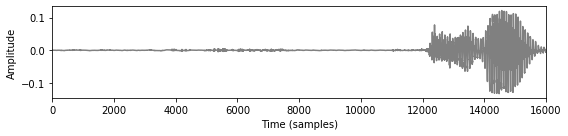

(20, 198)
MP3 file:  Fs = 16000, x.shape = (16000,), x.dtype = float64


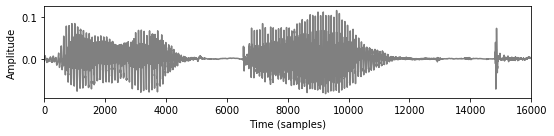

(20, 198)
MP3 file:  Fs = 16000, x.shape = (16000,), x.dtype = float64


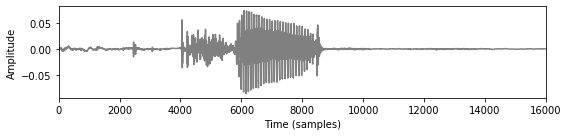

(20, 198)
MP3 file:  Fs = 16000, x.shape = (16000,), x.dtype = float64


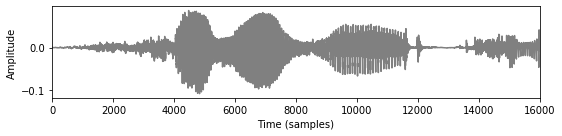

(20, 198)
MP3 file:  Fs = 16000, x.shape = (16000,), x.dtype = float64


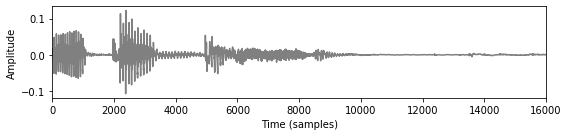

(20, 198)
MP3 file:  Fs = 16000, x.shape = (16000,), x.dtype = float64


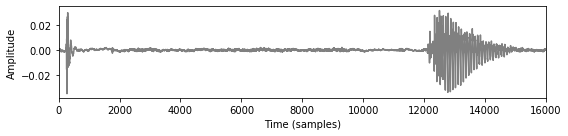

(20, 198)


In [92]:
### 10초짜리 데이터 1초씩(16000 샘플씩) 잘라서 넘파이배열에 추가하기
arr = np.empty((0, 16000,), int)
cnt = len(x) // 16000

for i in range(cnt):
    start = 16000 * i
    end = 16000 * (i + 1)
    new = x[start:end]
    new = new.reshape((1,) + new.shape)
    
    arr = np.append(arr, new, axis=0)

for i in arr:
    print_plot_play(x=i, Fs=16000, text='MP3 file: ')
    mfcc = librosa.feature.mfcc(y=x)
    print(mfcc.shape)